In [2]:
#Import dependencies
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
#Check version tensorflow
print(tf.__version__)

2.9.1


In [4]:
# Load images dataset
# https://www.tensorflow.org/tutorials/load_data/images
# To read train_images we must download the directory train_images from
# https://www.kaggle.com/competitions/hotel-id-to-combat-human-trafficking-2022-fgvc9/data
# After downloaded the images, we must unzip the file
batch_size = 32
img_height = 180
img_width = 180
data_dir="D:\\Armando\\MLMentoria\\train_images"

In [5]:
# Using keras utility to build dataset and we will inferred labels. Also we resize the images to standard size 180 x 180
# Note each sub-dir in train_images will be a label, each label is an id of a hotel 


# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
# Build datset to train model. We will use 80% of images to train the model
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 44703 files belonging to 3116 classes.
Using 35763 files for training.


In [8]:
class_names = train_ds.class_names
print(class_names)

['100055', '10010', '100143', '100206', '100292', '100297', '10031', '100317', '100326', '100410', '10054', '1007', '100784', '100860', '1009', '101242', '10129', '1013', '101396', '101899', '10191', '101974', '102048', '102119', '10214', '102157', '102219', '10283', '10284', '10290', '102917', '102950', '102995', '10300', '103150', '103164', '103254', '103319', '103379', '103458', '103533', '103650', '10389', '10390', '10394', '10410', '10411', '10425', '104342', '104393', '1046', '10475', '10503', '10542', '10578', '1060', '10678', '106794', '10684', '106915', '107043', '107115', '10728', '107503', '10751', '10755', '10766', '10771', '10776', '10785', '10790', '10807', '10824', '10834', '10838', '10849', '10854', '10855', '108817', '10884', '108959', '10907', '109168', '10947', '109481', '10959', '110119', '11025', '11039', '110509', '11060', '11099', '11101', '111413', '111485', '11165', '111671', '11200', '112022', '112194', '1122', '1123', '11254', '11257', '11260', '11279', '1128

In [6]:
# Build datset to validate model. We will use 30% of images to validate the model
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 44703 files belonging to 3116 classes.
Using 8940 files for validation.


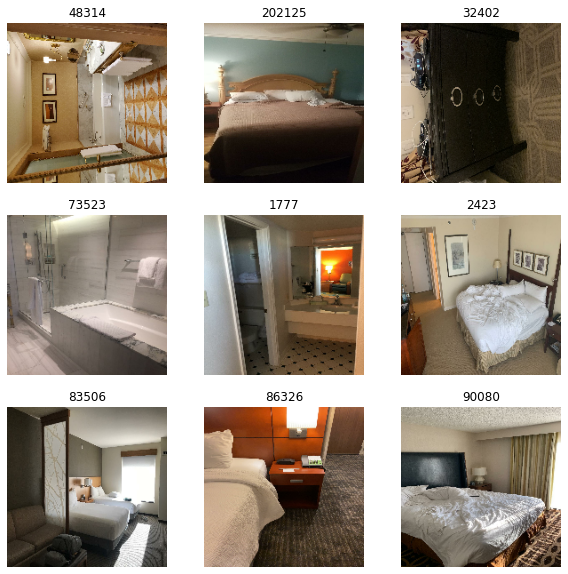

In [9]:
# Visualize some images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")